In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.signal import lfilter, butter
%matplotlib tk

In [8]:
fs = 1000
t = np.arange(0, 5, 1/fs)

signal = np.sin(2*np.pi*50*t) + 2*np.sin(2*np.pi*44*t)  + 0.5*np.sin(2*np.pi*57*t) 

In [9]:
sig_len = len(signal)
frq = np.linspace(0, fs, sig_len)
frq = frq[:sig_len//2]
len(frq), frq

psd = abs(np.fft.fft(signal)[:sig_len//2])*(2/sig_len)

In [10]:
fig, ax = plt.subplots(1, figsize=(14, 4))
ax.plot(frq, psd)
ax.set_xlim(40, 60)

(40, 60)

In [5]:
seconds = sig_len/fs
t = np.arange(0, seconds, 1.0/fs)
filter_order = 4

# Cut-off frequencies
fcs = [47, 53]

w = [fc/(fs / 2) for fc in fcs] # Normalize the frequency
b, a = butter(filter_order, w, 'bandpass')
signal = lfilter(b, a, signal)

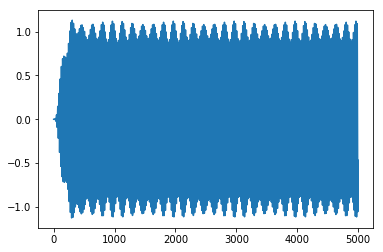

In [6]:
plt.plot(signal)